In [18]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing import load_images_from_folder

In [ ]:
X, y = load_images_from_folder("../data/lavouras")

In [9]:
classes = os.listdir("../data/lavouras")
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [16]:
def img_path_pandas_dataset(base_dir:str,classes:list):
    image_paths = []
    labels = []

    for cls in classes:
        class_dir = os.path.join(base_dir, cls)
        for img_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(cls)

    return pd.DataFrame({'image_path': image_paths, 'label': labels})


path = "../data/lavouras"
df = img_path_pandas_dataset(path,classes)


In [17]:
df

,image_path,label
0,../data/lavouras\Pepper__bell___Bacterial_spot...,Pepper__bell___Bacterial_spot
1,../data/lavouras\Pepper__bell___Bacterial_spot...,Pepper__bell___Bacterial_spot
2,../data/lavouras\Pepper__bell___Bacterial_spot...,Pepper__bell___Bacterial_spot
3,../data/lavouras\Pepper__bell___Bacterial_spot...,Pepper__bell___Bacterial_spot
4,../data/lavouras\Pepper__bell___Bacterial_spot...,Pepper__bell___Bacterial_spot
...,...,...
20634,../data/lavouras\Tomato_healthy\ff354b62-5981-...,Tomato_healthy
20635,../data/lavouras\Tomato_healthy\ff774aec-2504-...,Tomato_healthy
20636,../data/lavouras\Tomato_healthy\ff8b36d5-feaf-...,Tomato_healthy
20637,../data/lavouras\Tomato_healthy\ffb39943-eabb-...,Tomato_healthy


In [19]:
count = df['label'].value_counts()
count

label
Tomato__Tomato_YellowLeaf__Curl_Virus          3209
Tomato_Bacterial_spot                          2127
Tomato_Late_blight                             1909
Tomato_Septoria_leaf_spot                      1771
Tomato_Spider_mites_Two_spotted_spider_mite    1676
Tomato_healthy                                 1591
Pepper__bell___healthy                         1478
Tomato__Target_Spot                            1404
Potato___Early_blight                          1000
Potato___Late_blight                           1000
Tomato_Early_blight                            1000
Pepper__bell___Bacterial_spot                   997
Tomato_Leaf_Mold                                952
Tomato__Tomato_mosaic_virus                     373
Potato___healthy                                152
Name: count, dtype: int64

C:\Users\sergi\AppData\Local\Temp\ipykernel_7040\1655209613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count.index, y=count.values, palette=palette)
C:\Users\sergi\AppData\Local\Temp\ipykernel_7040\1655209613.py:6: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=count.index, y=count.values, palette=palette)


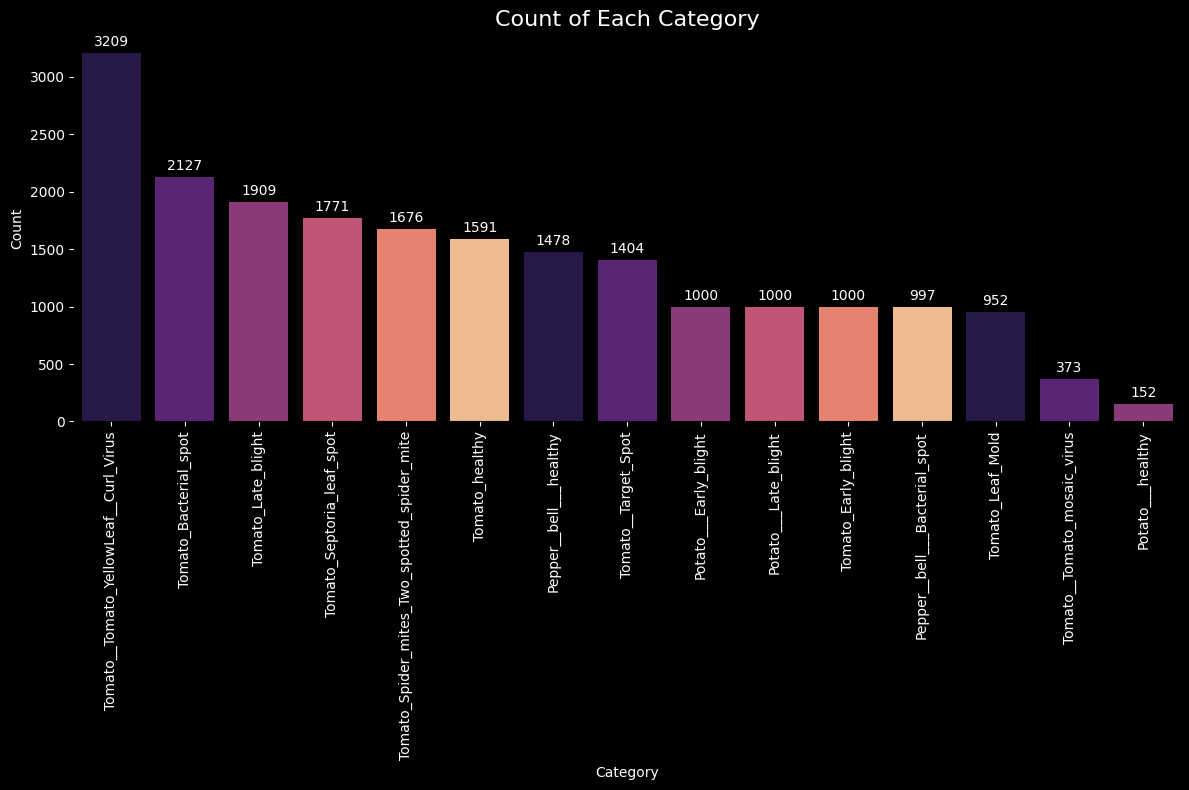

In [22]:

plt.figure(figsize=(12, 8), facecolor='black')
palette = sns.color_palette("magma")
sns.set_palette(palette)

# Bar Chart
ax = sns.barplot(x=count.index, y=count.values, palette=palette)


ax.set_title('Count of Each Category', fontsize=16, color='white')
ax.set_xlabel('Category', color='white')
ax.set_ylabel('Count', color='white')


ax.tick_params(axis='x', colors='white', rotation=90)
ax.tick_params(axis='y', colors='white')

# Add value labels on top of the bars
for i, val in enumerate(count.values):
    ax.text(i, val + max(count.values)*0.01, str(val), ha='center', va='bottom', fontsize=10, color='white')


ax.set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

plt.tight_layout()
plt.show()